In [1]:
import numpy as np

result = -(10/16 * np.log2(10/16) + 6/16 * np.log2(6/16))

print(result)

0.954434002924965


In [2]:
import numpy as np

result1 = 8/16 * (-(7/8 * np.log2(7/8) + 1/8 * np.log2(1/8)))
result2 = 8/16 * (-(3/8 * np.log2(3/8) + 5/8 * np.log2(5/8)))

print(result1 + result2)

0.7489992230622807


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


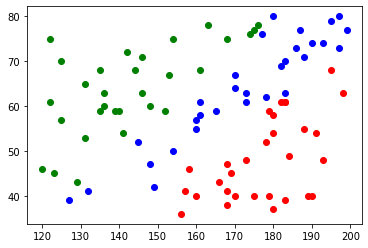

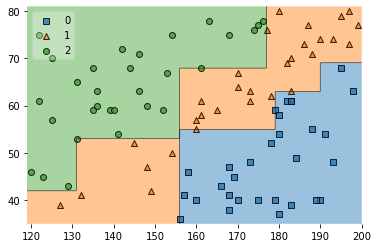

In [4]:
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

# training data set
df = pd.read_csv('./data/bmi/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# matplotlib을 이용해서 t_data가 0인 경우 red점으로,
# t_data가 1인경우 blue점으로, t_data가 2인경우 green점으로 표현
# 총 20000개 중에 각각 30개씩만 뽑아서 그래프를 그려보아요!

num_of_sample = 30

x_data_red = x_data[t_data==0][:num_of_sample]
t_data_red = t_data[t_data==0][:num_of_sample]

x_data_blue = x_data[t_data==1][:num_of_sample]
t_data_blue = t_data[t_data==1][:num_of_sample]

x_data_green = x_data[t_data==2][:num_of_sample]
t_data_green = t_data[t_data==2][:num_of_sample]

plt.scatter(x_data_red[:,0],x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0],x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0],x_data_green[:,1], color='g')

plt.show()

x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green), axis=0)

# sklearn 구현
model = DecisionTreeClassifier()
model.fit(x_data_sample,t_data_sample)

plot_decision_regions(X=x_data_sample,
                      y=t_data_sample,
                      clf=model,
                      legend=2)

plt.show()

In [6]:
%reset 

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# training data set
df = pd.read_csv('./data/digit-recognizer/train.csv')

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

model = DecisionTreeClassifier()
model.fit(x_data_train_norm,t_data_train)

result = model.predict(x_data_test_norm)
print(classification_report(t_data_test,result))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1242
           1       0.93      0.95      0.94      1429
           2       0.83      0.79      0.81      1276
           3       0.80      0.82      0.81      1298
           4       0.84      0.85      0.84      1236
           5       0.77      0.80      0.78      1119
           6       0.89      0.88      0.88      1243
           7       0.89      0.87      0.88      1334
           8       0.80      0.77      0.78      1204
           9       0.80      0.82      0.81      1219

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600

